Part 1 – Hypothesis Testing a. Using the data in homework.7.abalone.txt, compare the female (F), infant (I), and male (M) lengths to each other. Using a p-value cutoff of 0.05, which groups are statistically separable from another group (or groups), and which one(s)?

b. A database has a collection of associations between genes and diseases gleaned from scanning journal articles. Based on the data in the database, we are curious if gene X is associated with disease Y and is this association significant. The numbers are as follows : a. Number of journals mentioning both gene X and disease Y: 9 4 b. Number of journals mentioning gene X and not disease Y: 2 508 c. Number of journals mentioning disease Y and not gene X: 14951 d. Number of journals that don’t mentioning either gene X or disease Y: 18930453

In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import chi2_contingency

In [218]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the abalone data from the text file
abalones_df = pd.read_csv("homework.7.abalone.txt")

# Group the data by the "Sex" column to separate the groups: Female (F), Infant (I), and Male (M)
lengthgrp = abalones_df.groupby("Sex")

# Extract the Length data for each group
# This will allow us to compare the lengths across different sexes
male_len = lengthgrp.get_group("M")["Length"]
female_len = lengthgrp.get_group("F")["Length"]
infant_len = lengthgrp.get_group("I")["Length"]

# Perform two-sided T-tests to compare the lengths between each pair of groups
# We use a two-sided test because we are interested in whether the lengths differ in either direction (greater or smaller)
# Set up comparisons between male and female, male and infant, and female and infant

# Comparing Male and Female abalone lengths
male_female_len_test = ttest_ind(male_len, female_len, alternative='two-sided')
# Comparing Male and Infant abalone lengths
male_infant_len_test = ttest_ind(male_len, infant_len, alternative='two-sided')
# Comparing Female and Infant abalone lengths
female_infant_len_test = ttest_ind(female_len, infant_len, alternative='two-sided')

# Print the results of each test, including the p-values
# We are using a significance level (alpha) of 0.05, so we will interpret p-values relative to this threshold

print("Male vs. Female\n", "\t", male_female_len_test)
print("Male vs. Infant\n", "\t", male_infant_len_test)
print("Female vs. Infant\n", "\t", female_infant_len_test)


Male vs. Female
 	 TtestResult(statistic=-4.923512005809771, pvalue=8.987874966212848e-07, df=2833.0)
Male vs. Infant
 	 TtestResult(statistic=33.82148382736931, pvalue=2.5750935781959703e-211, df=2868.0)
Female vs. Infant
 	 TtestResult(statistic=39.6118129713921, pvalue=7.091203718452416e-270, df=2647.0)



1. Male vs. Female: The p-value is 8.987874966212848e-07, which is well below 0.05. Showing a statistically significant difference in lengths between male and female abalones.
2. Male vs. Infant: The p-value is 2.5750935781959703e-211, also far below 0.05, showing a significant difference in lengths between male and infant abalones.
3. Female vs. Infant: The p-value is 7.091203718452416e-270, giving a significant difference between female and infant abalones.

Since all p-values are below 0.05, each group (male, female, and infant) has statistically distinct lengths.

In [215]:
#Part 1 (b)
import numpy as np
from scipy.stats import chi2_contingency

# Create the contingency table for gene X and disease Y
# The table format is:
#       Disease Y    Not Disease Y
# Gene X      904           20508
# Not Gene X 14951       18930453
contingency_table_xy = np.array([[904, 20508], [14951, 18930453]])

# Perform the Chi-Squared test
# chi2_contingency function will return:
# - Chi-square statistic
# - p-value
# - Degrees of freedom
# - Expected frequencies table
stat, pvalue, dof, freq = chi2_contingency(contingency_table_xy)

# Print the results with explanations
print("Chi-Square Statistic:", stat)
print("P-Value:", pvalue)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", freq)


Chi-Square Statistic: 43903.67639373665
P-Value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
 [[1.78990116e+01 2.13941010e+04]
 [1.58371010e+04 1.89295669e+07]]


If p-value < 0.05, we reject the null hypothesis and we can there is a significant association. Here, the p-value is low (significantly less than 0.05), so we reject the null hypothesis. That means there is statistically significant link between gene X and disease Y.

Part 2 – Time-series Analysis 
a. Read in the data from homework.8.flow_data.csv.  You can assume that the data is 
clean.  Convert the Time column to a datetime index.  Show the head of the data frame. 
b. Plot all of the data in the LS06-347 column 
c. Create and plot a 14-day rolling average for the LS06-347 column with center=True 
d. Plot the 14-day rolling average for just 2010

In [83]:
## Part 2 (a)

flow_data = pd.read_csv("homework.7.flow_data.csv")

## Converting the Time column to a datetime index 
flow_data["Time"] = pd.to_datetime(flow_data["Time"])
flow_data.set_index("Time", inplace=True)  ## Make the change in the actual dataset
flow_data.head()   # Display the first few rows of the data

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


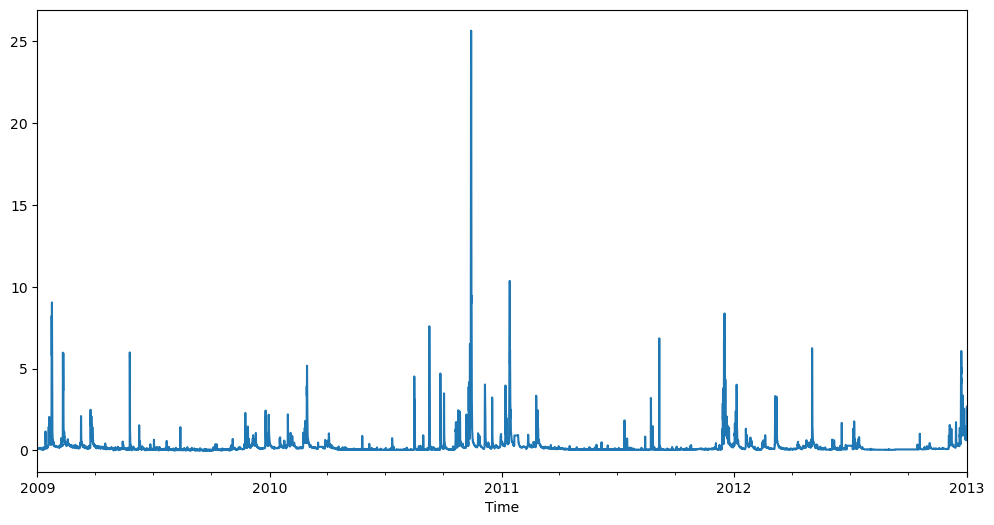

In [85]:
## Part 2 (b)
import matplotlib.pyplot as plt
## Plotting all data in the 'LS06-347' column
plt.figure(figsize = (12, 6))
flow_data["L06_347"].plot()
plt.show()

This time-series plot shows the fluctuations in the L06_347 variable from 2009 to 2013, with significant spikes around 2011. The large spikes indicate occasional peaks in values, suggesting events or periods with higher-than-normal activity, while the rest of the data remains relatively low and stable.

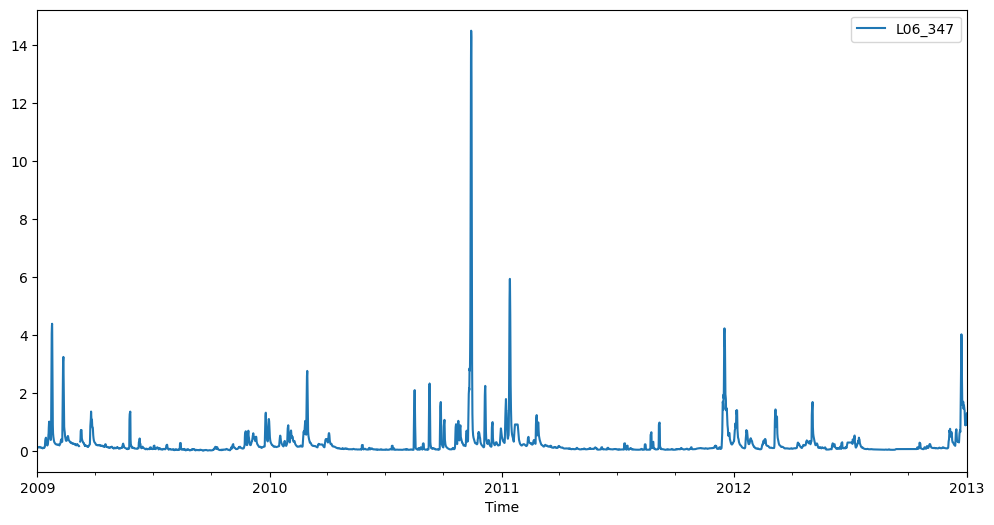

In [86]:
## Part 2 (c)
## Creating and plotting a 14-day rolling average for the 'LS06-347' column with center=True 
L06_347_14d = flow_data["L06_347"].rolling(window = 14, center = True).mean()
plt.figure(figsize=(12, 6))
L06_347_14d.plot()
plt.legend() 
plt.show()

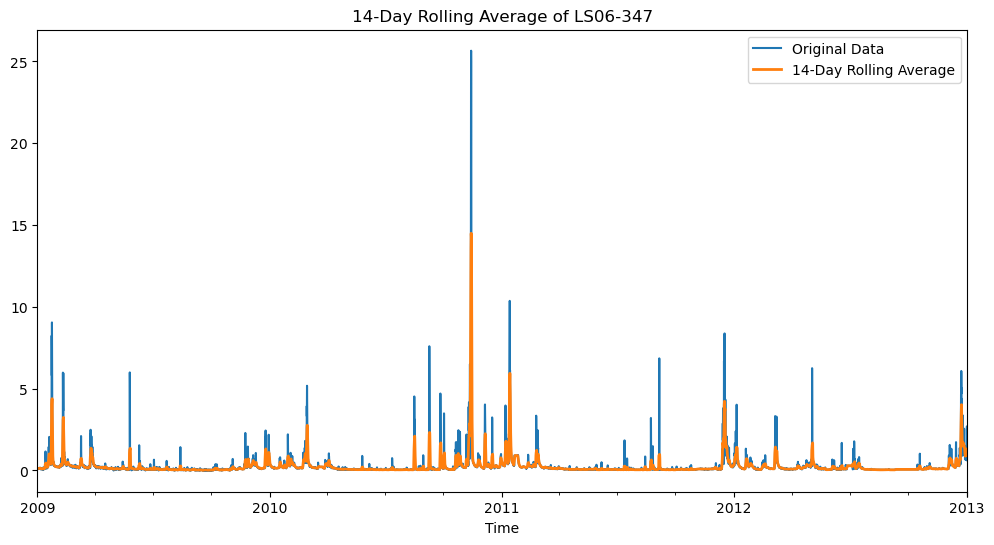

In [87]:

flow_data['LS06-347_rolling'] = flow_data['L06_347'].rolling(window=14, center=True).mean()

## Plot both the original and rolling average to see the difference between both graphs 
plt.figure(figsize=(12, 6))
# Plot the original 'L06_347' data
flow_data['L06_347'].plot(label='Original Data')
# Plot the calculated 14-day rolling average
flow_data['LS06-347_rolling'].plot(label='14-Day Rolling Average', linewidth=2)
plt.title('14-Day Rolling Average of LS06-347')

# Display the legend to differentiate between original data and rolling average
plt.legend()
plt.show()

This graph compares the original L06_347 data (in blue) with its 14-day rolling average (in orange), which smooths out the short-term fluctuations. The rolling average line shows a more stable trend, highlighting major peaks while reducing day-to-day noise in the data.

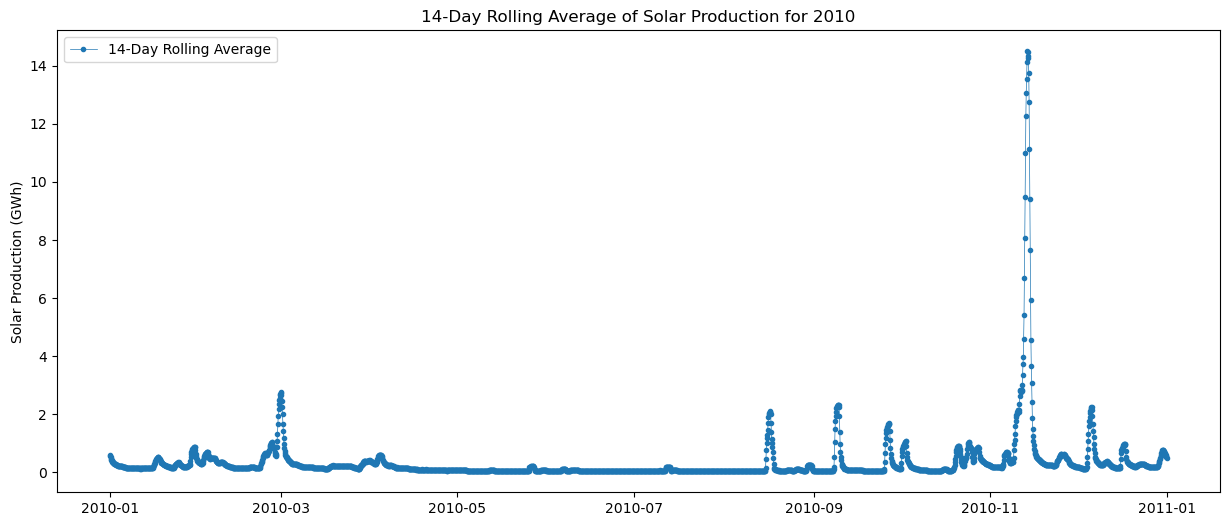

In [224]:
## Question 2d
## Plotting the 14-day average for 2010 Data 

# Define start and end dates for 2010
start_date = "2010-01-01"
end_date = "2010-12-31"

# Plot the 14-day rolling average specifically for 2010
plt.figure(figsize=(15, 6))
plt.plot(flow_data.loc[start_date:end_date, "LS06-347_rolling"], marker=".", linestyle="-", linewidth=0.5, label="14-Day Rolling Average")
plt.ylabel('Solar Production (GWh)')
plt.title('14-Day Rolling Average of Solar Production for 2010')
plt.legend()
plt.show()


This graph displays the 14-day rolling average of solar production for 2010. It shows fluctuations throughout the year, with a significant spike in late 2010, indicating a period of higher solar production.

Part 3 – Hierarchical Clustering 
Read in the Iris data. 
a. Do heirarchical clustering on the SepalLengthCm, SepalWidthCm, PetalLengthCm, and 
PetalWidthCm columns using the ward method for the distance measure.  Following the 
nomenclature in my .ipynb file,  X should be the 4 columns above, and Y should be the 
Species.  Be sure to omit the Species and Id columns from the clustering (from X). 
b. Plot the dendrogram. Suggested minimum figure size is (15,20). Use orientation="left".  
Make sure to use Y as the labels (will colour the branches). 
c. Use fcluster to get the clusters at a depth = 4. Print the list of clusters. 
d. Add the cluster numbers back to the original iris dataframe. Print the head of the 
dataframe.

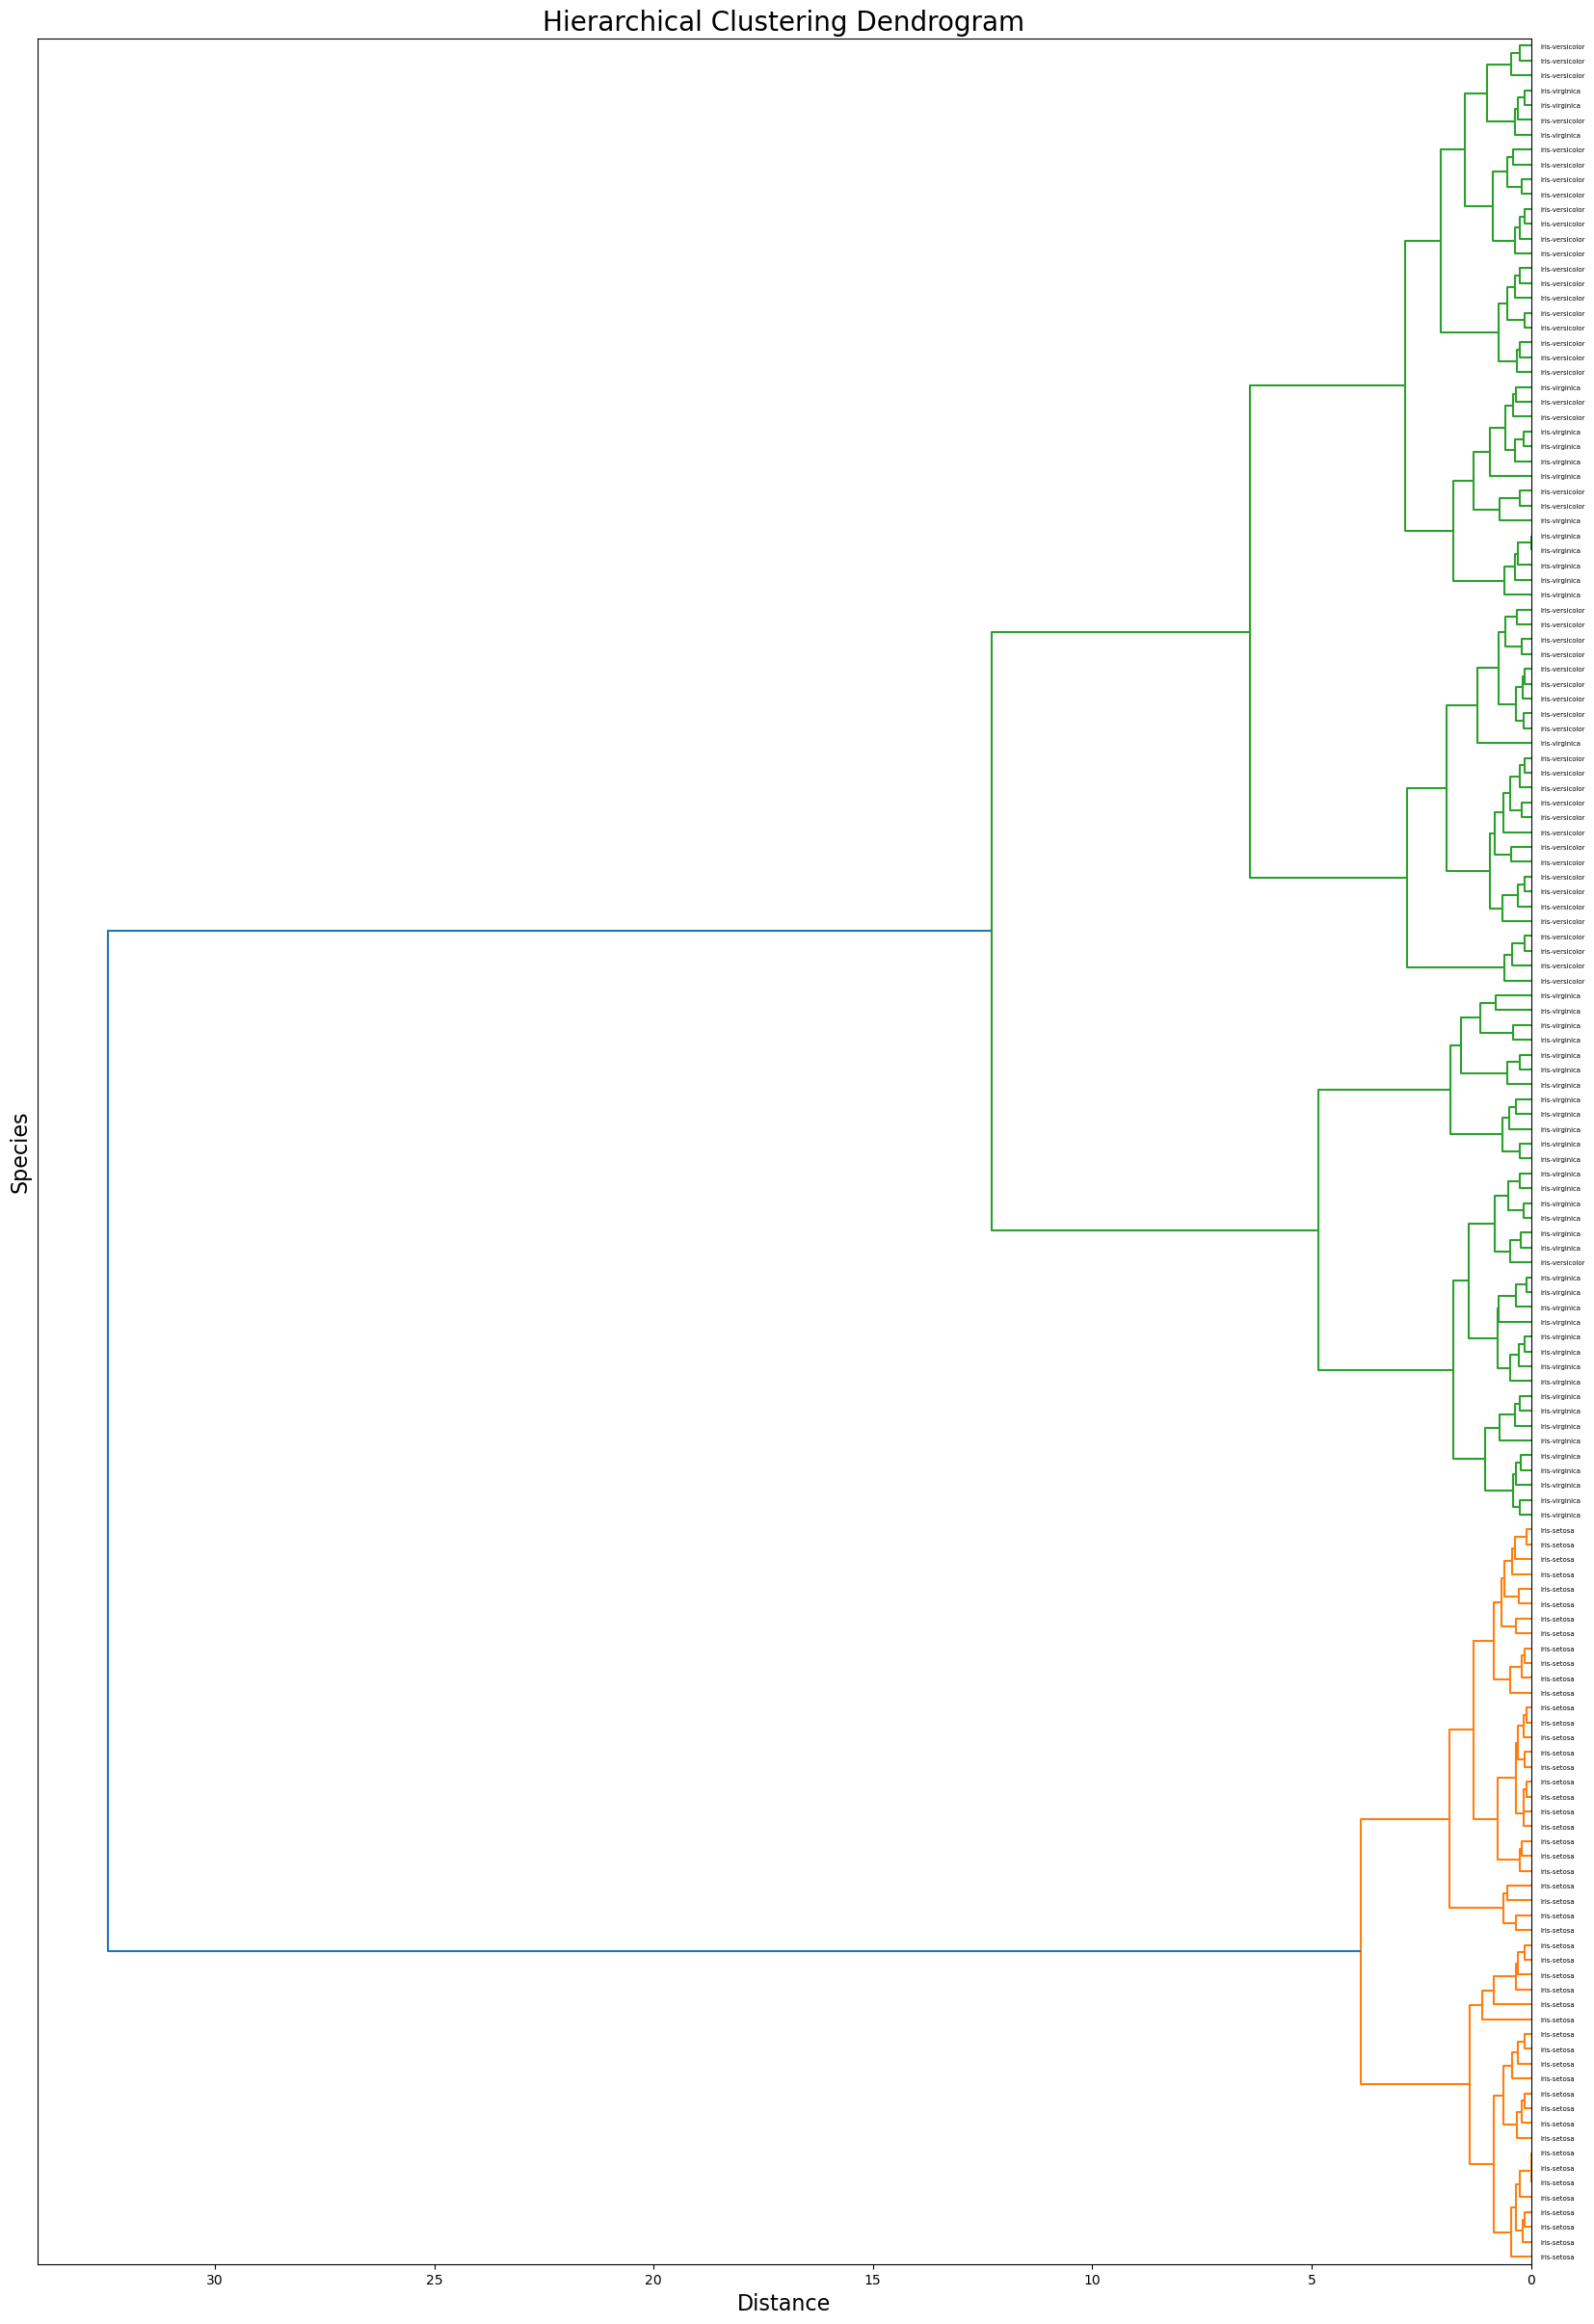

In [91]:
## Part 3A and 3B
from scipy.cluster import hierarchy 

# Load the Iris dataset
iris_df = pd.read_csv("iris.csv")

# Specify Y as the Species column, which will be used for labeling in the dendrogram
y = iris_df["Species"]

# Specify X as the data from the SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm columns
# We omit the 'Species' and 'Id' columns from X because we don't want them in the clustering process
x = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Perform hierarchical clustering using the 'ward' method, which minimizes the variance within clusters
# This creates the linkage matrix 'z' for the clustering structure based on X
z = hierarchy.linkage(x, "ward")

# Set up the plot for the dendrogram
plt.figure(figsize=(20, 30))  # Set figure size to provide enough space for the dendrogram
plt.title("Hierarchical Clustering Dendrogram", fontsize=20)  # Title for the plot
plt.xlabel("Distance",fontsize=16)  # Label for the x-axis representing the linkage distance
plt.ylabel("Species",fontsize=16)  # Label for the y-axis showing the species

# Create the dendrogram using the ward linkage matrix 'z'
# - 'labels=y.values' uses the Species names as labels for each data point in the dendrogram
# - 'orientation="left"' rotates the dendrogram for a horizontal layout
hierarchy.dendrogram(z, labels=y.values, orientation="left")

# Display the dendrogram
plt.show()

Hierarchical clustering is performed using the ward method on the SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm columns, excluding the Species and Id columns. 

A dendrogram is plotted with Y (species) as labels to color the branches, helping visualize the clustering hierarchy. The horizontal orientation make it easier to see cluster separations, showing how each species branches out and which samples are grouped together.

In [94]:
## Part 3 C
## Adding fcluster to get the clusters at a depth of 4 

from scipy.cluster.hierarchy import fcluster
max_depth = 4

## Defining links between cluster classes 
clusters = fcluster(z, max_depth, criterion = "distance")
clusters  

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 4, 5, 4, 5,
       4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 2, 5, 4, 4, 4, 4, 5, 4, 5, 5, 5,
       4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 2, 5, 3, 2, 2, 3, 4, 3, 2, 3,
       2, 2, 2, 5, 5, 2, 2, 3, 3, 5, 2, 5, 3, 5, 2, 3, 5, 5, 2, 3, 3, 3,
       2, 5, 5, 3, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 5, 2, 2, 5], dtype=int32)

Here we have used fcluster function that "cuts" the dendrogram at a specified height, and creates distinct clusters that correspond to significant divisions within the data.

In [95]:
## Part 3d
## Adding the cluster numbers into the original iris dataframe 

iris_df["Clusters"] = clusters 
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


The computed cluster numbers are added back to the original Iris dataframe, which allows a direct comparison between actual species labels and cluster assignments.

Part 4 – KMeans Clustering 
Read in the Iris data. 
a. Create a new dataframe containing only the PetalLengthCm and PetalWidthCm data 
b. Do kmeans clustering on the dataframe created in 2a using 3 clusters 
c. Show the sum of the squared error (SSE) 
d. Show the cluster group assignments 
e. Do a scatter plot on PetalLengthCm and PetalWidthCm and show the centroid centres 
f. Add the cluster assignments from 2d to the original dataframe.  Print the head of the 
dataframe. 

In [183]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_df = pd.read_csv("iris.csv")

# Part 4 a
## Creating a new dataframe with PetalLengthCM and PetalWidthCm 
petal_df = iris_df[['PetalLengthCm', 'PetalWidthCm']]
print(petal_df.head())

   PetalLengthCm  PetalWidthCm
0            1.4           0.2
1            1.4           0.2
2            1.3           0.2
3            1.5           0.2
4            1.4           0.2


In [189]:
###  Part 4 b
# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(petal_df)



C:\Users\Kamrun Nahar Mim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [191]:
### Part 4c, 4d
# Get the sum of squared errors
sse = kmeans.inertia_
print("Sum of Squared Errors (SSE):", sse)

# Get the cluster assignments
cluster_assignments = kmeans.labels_
print("Cluster Assignments:", cluster_assignments)
  

Sum of Squared Errors (SSE): 31.38775897435898
Cluster Assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


The Sum of Squared Errors (SSE) is 31.39, suggests a moderately good fit, meaning that the data points are reasonably close to their cluster centroids. The Cluster Assignments show which of the three clusters each data point belongs to, with labels 0, 1, and 2 representing each cluster.

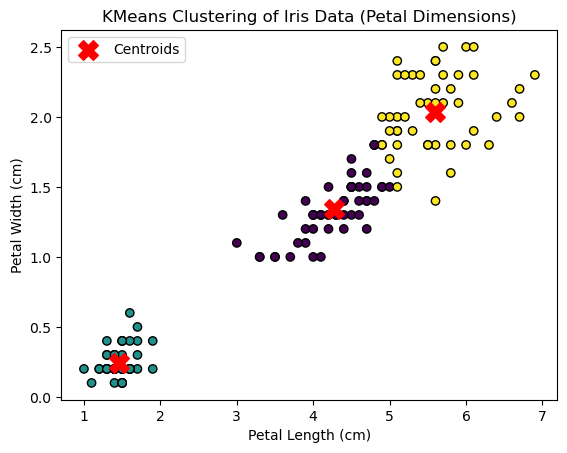

In [195]:
## Part 4E
# Scatter plot of the clusters
plt.scatter(petal_df['PetalLengthCm'], petal_df['PetalWidthCm'], c=cluster_assignments, cmap='viridis', marker='o', edgecolor='k')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("KMeans Clustering of Iris Data (Petal Dimensions)")
plt.legend()
plt.show()


The scatter plot shows three distinct clusters of data points based on petal length and width, with each color representing a different cluster. The red X's indicate the centroids of each cluster, showing the center of each group, and the clustering appears to align well with the natural separation in the data.

In [208]:
## Part 4F
# Check if lengths match
if len(df) == len(cluster_assignments):
    # Add cluster assignments directly if lengths match
    df["Cluster Assignments"] = cluster_assignments
else:
    # Add the assignments to a new dataframe matching the clustering data only
    df_clustered = df.loc[petal_df.index].copy()
    df_clustered["Cluster Assignments"] = cluster_assignments
    print("Cluster assignments added to df_clustered with matching rows of petal_df.")
    print(df_clustered.head())

# Optionally, print the original df head to confirm
print(df.head())


Cluster assignments added to df_clustered with matching rows of petal_df.
   age     sex     bmi  children smoker     region      charges  smoker_int  \
0   19  female  27.900         0    yes  southwest  16884.92400           1   
1   18    male  33.770         1     no  southeast   1725.55230           0   
2   28    male  33.000         3     no  southeast   4449.46200           0   
3   33    male  22.705         0     no  northwest  21984.47061           0   
4   32    male  28.880         0     no  northwest   3866.85520           0   

   Cluster Assignments  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
   age     sex     bmi  children smoker     region      charges  smoker_int
0   19  female  27.900         0    yes  southwest  16884.92400           1
1   18    male  33.770         1     no  southeast   1725.55230           0
2   28    male  33.000         3     no  southeast   4449.46200          

From this output, we can observe which cluster each data point belongs to, allowing us to examine how clustering relates to other variables like age, BMI, smoking status, and region. This could reflect similarities between different features.

Part 5 – Linear Regression 
Read in the data from insurance.csv. 
a. Add a column to the data frame containing 1 if the person is a smoker, and 0 if the 
person is not a smoker. Show the head of the dataframe 
b. Show a correlation table for the data frame.  Use which ever method you want. 
c. Split the smoker_int (X) and charges (y) columns into training and test sets. Use 
train_size=0.3 and shuffle=True.  If you run into a problem, it is probably due to X 
needing to be a 2D array.  Look at how I grabbed the non_smokers age data vs how I 
grabbed the non_smokers charges data. 
d. Create a linear regression model using the training data 
e. Show the r2 
f. Print the equation for the line using the coefficients calculated by the model 

In [124]:
## Part 5
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('insurance.csv')

#### a) Add a column indicating smoker status as 1 (smoker) or 0 (non-smoker)

df['smoker_int'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
print(df.head())


   age     sex     bmi  children smoker     region      charges  smoker_int
0   19  female  27.900         0    yes  southwest  16884.92400           1
1   18    male  33.770         1     no  southeast   1725.55230           0
2   28    male  33.000         3     no  southeast   4449.46200           0
3   33    male  22.705         0     no  northwest  21984.47061           0
4   32    male  28.880         0     no  northwest   3866.85520           0


In [ ]:
# Part 5(b)

# Generate the correlation table for the numeric columns in the dataframe
correlation_table = df.corr(numeric_only=True)

print(correlation_table)

                 age       bmi  children   charges  smoker_int
age         1.000000  0.109272  0.042469  0.299008   -0.025019
bmi         0.109272  1.000000  0.012759  0.198341    0.003750
children    0.042469  0.012759  1.000000  0.067998    0.007673
charges     0.299008  0.198341  0.067998  1.000000    0.787251
smoker_int -0.025019  0.003750  0.007673  0.787251    1.000000


After creating a numeric column for smoker status (1 for smokers, 0 for non-smokers), we can compute the correlation table using only numeric data. This will allow us to observerelationships between the 'smoker_int' column, 'charges', and other numeric attributes in the dataset. There's a strong positive correlation (0.79) between being a smoker and higher medical charges. This means that smokers tend to have much higher healthcare costs, which makes smoking status an important factor to look at when predicting charges. Other correlations, such as between age and charges or BMI and charges, show moderate relationships but are weaker compared to 'smoker_int' and 'charges'. 

In [ ]:
## Part 5 c
## Training and Test Sets for smokers and non_smokers 

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

# Ensuring X is a 2D array by reshaping
X = df['smoker_int'].values.reshape(-1, 1)  # Reshape to 2D with one column
y = df['charges'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, shuffle=True)

# Print shapes to verify 2D structure
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Print sample data from the training and test sets to check output
print("\nSample X_train:\n", X_train[:5])  # Print first 5 rows of X_train
print("Sample y_train:\n", y_train[:5])    # Print first 5 rows of y_train
print("\nSample X_test:\n", X_test[:5])    # Print first 5 rows of X_test
print("Sample y_test:\n", y_test[:5])      # Print first 5 rows of y_test


X_train shape: (401, 1)
X_test shape: (937, 1)
y_train shape: (401,)
y_test shape: (937,)

Sample X_train:
 [[0]
 [0]
 [1]
 [1]
 [1]]
Sample y_train:
 [ 9048.0273   5138.2567  44501.3982  37133.8982  36898.73308]

Sample X_test:
 [[1]
 [0]
 [1]
 [0]
 [0]]
Sample y_test:
 [15359.1045   6748.5912  19798.05455  4266.1658  18804.7524 ]


In this case, smoker_int is a single feature. With scikit-learn, the feature array (X) must be in a 2D format, where each feature is a separate column. So we had to reshape X. 
train_size=0.3, meaning 30% of the data will be used for training, while the remaining 70% is used for testing.
shuffle=True, which randomizes the data before splitting, providing a more balanced mix in each subset. 

In [175]:
## Part 5 d
## Create a linear Regression model using the training Data 

model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
# Part 5e
###Calculate and print the R-squared value on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared value on test data:", r2)

R-squared value on test data: -0.6490367361868394


The R-squared value (-0.649) from the linear regression is negative, which means that the model performs poorly on the test data. So I'd assume that the relationship between smoking and charges is better explained by simply comparing group averages rather than fitting a regression line.  

In [ ]:
### Calculate average charges for smokers and non-smokers
avg_charges_smokers = insurance_df[insurance_df['smoker_int'] == 1]['charges'].mean()
avg_charges_non_smokers = insurance_df[insurance_df['smoker_int'] == 0]['charges'].mean()

# Display the results
print("Average charges for smokers:", avg_charges_smokers)
print("Average charges for non-smokers:", avg_charges_non_smokers)
print("Difference in average charges:", avg_charges_smokers - avg_charges_non_smokers)

Average charges for smokers: 32050.23183153284
Average charges for non-smokers: 8434.268297856204
Difference in average charges: 23615.963533676637


The difference in averages is very large, which shows that being a smoker is strongly associated with higher medical costs.

In [230]:
### Part 5f

print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print(f"Regression equation: charges = {model.coef_[0]:.2f} * smoker_int + {model.intercept_:.2f}")


print("The equation for predicting medical charges based on the linear regression model") 
print("This means, for non-smokers (smoker_int = 0), the charges are approximately $8,174.95. For smokers (smoker_int = 1), the charges increase by $23,720.61, resulting in a higher average cost.")

Coefficient (slope): 23720.609611855274
Intercept: 8174.9523361839465
Regression equation: charges = 23720.61 * smoker_int + 8174.95
The equation for predicting medical charges based on the linear regression model
This means, for non-smokers (smoker_int = 0), the charges are approximately $8,174.95. For smokers (smoker_int = 1), the charges increase by $23,720.61, resulting in a higher average cost.
